In [176]:
# We need the alphabet because we convert letters into numerical values
# to be alble to use mathematical operations (note we encrypt the spaces as well)

ALPHABET = ' ABCDEFGHIJKLMNOPQRSTUVWXYZ' # 26 + 1 = 27

In [177]:
KEY = 3

In [178]:
def caesar_encrypt(plain_text):
  # the encrypted message
  cipher_text = ''

  # we make the algorithm case insisitive
  plain_text = plain_text.upper()

  # consider all the letters in the plain_text
  for c in plain_text:
    # find the numerical representation (index) associated with
    # that character in the alphabet
    index = ALPHABET.find(c)

    # caesar encryption is just a simple shift of characters according
    # to the key use modular arithmetic to transform the values within
    # the range [0,num_of_letters_in_alphabet]
    index = (index+KEY) % len(ALPHABET)

    # keep appending the encrypted character to the cipher_text
    cipher_text = cipher_text + ALPHABET[index]

  return cipher_text


In [179]:
def caesar_decrypt(cipher_text):

  plain_text = ''

  for c in cipher_text:
    index = ALPHABET.find(c)
    index = (index - KEY) % len(ALPHABET)
    plain_text = plain_text + ALPHABET[index]

  return plain_text

In [180]:
if __name__ == '__main__':

  m = 'I am Franciny Salles Rojas'
  e = caesar_encrypt(m)
  d = caesar_decrypt(e)

  print("Original Message: " + m)
  print("Encrypting......: " + e)
  print("Decrypting......: " + d)

Original Message: I am Franciny Salles Rojas
Encrypting......: LCDPCIUDQFLQACVDOOHVCURMDV
Decrypting......: I AM FRANCINY SALLES ROJAS


In [181]:
### Cracking Caesar Cipher
# The main problem with Caesar Cipher is that there are just a few possible key values
# The keyspace of the cryptosystem is small + there are only 26 possible key values (the size of the alphabet)
# What if we use caesar cipher multiple times? unfortunately the cryptosystem will not get more secure if we repeat the operations multiple times
# for example using Caesar-encryption with key 2 and then with key 3 is the same as using key 5
# There are 2 types of approaches to crack Caesar-cipher: 1) Brute-force attacka; 2) Frequency-analysis

# Cracking Caesar-cipher with brute-force implementation

ALPHABET = ' ABCDEFGHIJKLMNOPQRSTUVWXYZ'

def crack_caesar(cipher_text):
  for key in range(len(ALPHABET)):
    # reinitialize this to be an empty string
    plain_text = ''

    # we just to make a simple caesar decryption
    for c in cipher_text:
      index = ALPHABET.find(c)
      index = (index - key) % len(ALPHABET)
      plain_text = plain_text + ALPHABET[index]

    # print the actual decrypted string with the given key
    print('With key %s, the result is: %s' % (key, plain_text))


In [182]:
if __name__ == '__main__':
  cipher = 'LCDPCIUDQFLQACVDOOHVCURMDV'
  crack_caesar(cipher)

With key 0, the result is: LCDPCIUDQFLQACVDOOHVCURMDV
With key 1, the result is: KBCOBHTCPEKP BUCNNGUBTQLCU
With key 2, the result is: JABNAGSBODJOZATBMMFTASPKBT
With key 3, the result is: I AM FRANCINY SALLES ROJAS
With key 4, the result is: HZ LZEQ MBHMXZR KKDRZQNI R
With key 5, the result is: GYZKYDPZLAGLWYQZJJCQYPMHZQ
With key 6, the result is: FXYJXCOYK FKVXPYIIBPXOLGYP
With key 7, the result is: EWXIWBNXJZEJUWOXHHAOWNKFXO
With key 8, the result is: DVWHVAMWIYDITVNWGG NVMJEWN
With key 9, the result is: CUVGU LVHXCHSUMVFFZMULIDVM
With key 10, the result is: BTUFTZKUGWBGRTLUEEYLTKHCUL
With key 11, the result is: ASTESYJTFVAFQSKTDDXKSJGBTK
With key 12, the result is:  RSDRXISEU EPRJSCCWJRIFASJ
With key 13, the result is: ZQRCQWHRDTZDOQIRBBVIQHE RI
With key 14, the result is: YPQBPVGQCSYCNPHQAAUHPGDZQH
With key 15, the result is: XOPAOUFPBRXBMOGP  TGOFCYPG
With key 16, the result is: WNO NTEOAQWALNFOZZSFNEBXOF
With key 17, the result is: VMNZMSDN PV KMENYYREMDAWNE
With key 18, the res

In [183]:
# Frequency analysis implementation
import matplotlib.pylab as plt

# these are the letters we are interested in then dealing with frequency-analysis
# WHITE SPACE IS THE MOST FREQUENT 'LETTER' IN THE ENGLISH ALPHABET !!!

LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [184]:
def frequency_analysis(text):

  # the text we analyse
  text = text.upper()

  # we use a dictionaty to store the letter-frequency pair
  letter_frequencies = {}

  for letter in LETTERS:
    letter_frequencies[letter] = 0

  for letter in text:
    if letter in LETTERS:
      letter_frequencies[letter] += 1

  return letter_frequencies

In [185]:
def plot_distribution(frequencies):
  plt.bar(frequencies.keys(), frequencies.values())
  plt.show()

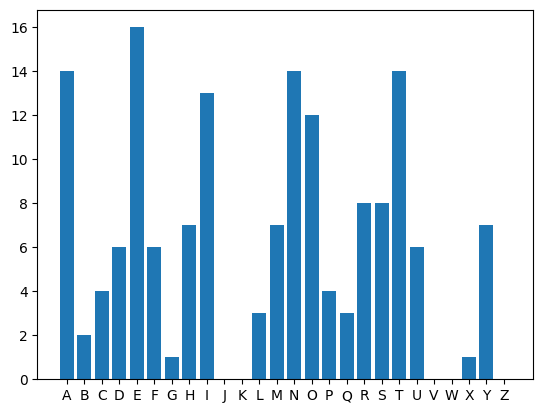

In [186]:
if __name__ == '__main__':

  plain_text = "Shannon defined the quantity of information produced by a source--for example, the quantity in a message--by a formula similar to the equation that defines thermodynamic entropy in physics."
  freq = frequency_analysis(plain_text)
  plot_distribution(freq)

In [187]:
### Cracking Caesar-cipher with frequency analysis
def frequency_analysis(cipher_text):

  # the text we analyse
  cipher_text = cipher_text.upper()

  # we use a dictionaty to store the letter-frequency pair
  letter_frequencies = {}

  # initialize the dictionar (of course with 0 frequencies)
  for letter in LETTERS:
    letter_frequencies[letter] = 0

  # let's consider the text we want to analyse
  for letter in cipher_text:
    # we keep incrementing the occurrence of the given letter
    if letter in LETTERS:
      letter_frequencies[letter] += 1

  return letter_frequencies

In [188]:
# plot the histogram of the letter-frequency pairs
def plot_distribution(frequencies):
  plt.bar(frequencies.keys(), frequencies.values())
  plt.show()

In [189]:
def caesar_crack(text):
  freq = frequency_analysis(text)
  freq = sorted(freq.items(), key=lambda x: x[0], reverse=True)
  print("The possible key value: %s" % (LETTERS.find(freq[0][0]) - LETTERS.find('E')))
  #print(freq)
  #plot_distribution(freq)

In [190]:
if __name__ == '__main__':
  # I have used key
  cipher_text = 'LCDPCIUDQFLQACVDOOHVCURMDV'
  caesar_crack(cipher_text)


The possible key value: 21


In [191]:
### Detecting english language implementation
# we need the alphabet because we convert letters into numerical values to be able to use
# mathematical operations (note we encrypt the spaces as well)
# we need the alphabet because we convert letters into numerical values to be able to use
# mathematical operations (note we encrypt the spaces as well)
ALPHABET = ' ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# we store the english words in a list (maybe a dictionary would be better)
ENGLISH_WORDS = []


# load the english words
def get_data():
    # let's load all the english words from a .txt file
    dictionary = open("english_words.txt", "r")

    # initialize the ENGLISH_WORDS list with the words present in the file
    # every word is in a distinct line so that why we have to split('\n')
    for word in dictionary.read().split('\n'):
        ENGLISH_WORDS.append(word)

    dictionary.close()


# count the number of english words in a given text
def count_words(text):
    # upper case letters are needed
    text = text.upper()
    # transform the text into a list of words (split by spaces)
    words = text.split(' ')
    # matches counts the number of english words in the text
    matches = 0

    # consider all the words in the text and check whether the given word is english or not
    for word in words:
        if word in ENGLISH_WORDS:
            matches = matches + 1

    return matches


# decides whether a given text is english or not
def is_text_english(text):
    # number of english words in a given text
    matches = count_words(text)

    # you can define your own classification algorithm
    # in this case the assumption: if 70% of the words in the text are english words then
    # it is an english text
    if (float(matches) / len(text.split(' '))) * 100 >= 70:
        return True

    # not an english text
    return False


# cracking the caesar encryption algorithm with brute-force
def caesar_crack(cipher_text):
    # we try all the possible key values so the size of the ALPHABET
    for key in range(len(ALPHABET)):

        # reinitialize this to be an empty string
        plain_text = ''

        # we just have to make a simple caesar decryption
        for c in cipher_text:
            index = ALPHABET.find(c)
            index = (index - key) % len(ALPHABET)
            plain_text = plain_text + ALPHABET[index]

        # print the actual decrypted string with the given key
        if is_text_english(plain_text):
            print("We have managed to crack Caesar cipher, the key is: %s, the message is %s" % (key, plain_text))


if __name__ == "__main__":
    get_data()
    encrypted = 'VJKUBKUBCBOGUUCIG'
    caesar_crack(encrypted)


We have managed to crack Caesar cipher, the key is: 2, the message is THIS IS A MESSAGE
